In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [7]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [19]:
RegionCasualtiesDF = gtdDF[['success','suicide','nkill','nwound','iyear','region_txt','casualties']]
RegionCasualtiesDF.head()

,success,suicide,nkill,nwound,iyear,region_txt,casualties
0,1,0,0.0,7.0,2000,Sub-Saharan Africa,7.0
1,1,0,0.0,7.0,2000,Sub-Saharan Africa,7.0
2,1,0,1.0,2.0,2000,South Asia,3.0
3,1,0,0.0,1.0,2000,Eastern Europe,1.0
4,1,0,6.0,10.0,2000,Sub-Saharan Africa,16.0


In [10]:
RegionCasualtiesDF = pd.get_dummies(RegionCasualtiesDF)
RegionCasualtiesDF.head()

,success,suicide,nkill,nwound,iyear,casualties,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe
0,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1.0,2.0,2000,3.0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0.0,1.0,2000,1.0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,6.0,10.0,2000,16.0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0.0,0.0,2000,0.0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0.0,0.0,2000,0.0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,0.0,0.0,2000,0.0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0.0,1.0,2000,1.0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,0,0.0,0.0,2000,0.0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
# Assign X (data) and y (target)
X = RegionCasualtiesDF.drop("casualties", axis=1)
y = RegionCasualtiesDF["casualties"].values.reshape(-1,1)
print(X.shape, y.shape)

(92700, 17) (92700, 1)


In [12]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [15]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

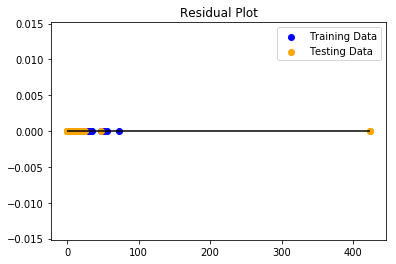

In [16]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.7903051123303537e-29, R2: 1.0


In [20]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0017062683349789445, R2: 0.999894583228102


In [21]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.6642415178355217e-13, R2: 0.9999999999999836


In [22]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.0013936736505068728, R2: 0.9999138959715164
